In [11]:
import numpy as np
import scipy.io as spio
import scipy as sp
from matplotlib import pyplot as plt


# Projeto 4 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Geraldo Teixeira do Nascimento Filho
## Matrícula: 202024740

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [2]:
#Código das funções utilizadas.

# Questão 1

Considere um sinal $x\left[n\right]$ com 16 amostras:

$$
x\left[n\right] = \left\{ 1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 1\right\}
$$


## Questão 1a (1.0 ponto)

Calcule a DFT do sinal através da equação:

$$
X\left[k\right] = \sum_{n = 0}^{N-1} x\left[n\right] W_{N}^{kn}
$$

com $W_{N} = e^{-\frac{2 \pi}{N}}$.

In [2]:

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 1])

N = len(x)

X = []
for k in range(N):
    W_N_kn = np.exp(-2j * np.pi * k * np.arange(N) / N)
    X_k = np.sum(x * W_N_kn)
    X.append(X_k)

X = np.array(X)

print(X)



[ 7.20000000e+01+0.00000000e+00j -2.52741424e+01-5.02733949e+00j
  3.43024900e-15-4.55531587e-16j -2.23982881e+00-1.49660576e+00j
 -1.42108547e-14+0.00000000e+00j -4.46462692e-01-6.68178638e-01j
 -1.42875499e-14+3.29634194e-15j -3.95661299e-02-1.98912367e-01j
  0.00000000e+00-1.11479998e-14j -3.95661299e-02+1.98912367e-01j
 -7.27366155e-15-2.11514494e-14j -4.46462692e-01+6.68178638e-01j
 -5.32907052e-14-1.42108547e-14j -2.23982881e+00+1.49660576e+00j
  2.58372708e-14+1.20213343e-14j -2.52741424e+01+5.02733949e+00j]


## Questão 1b (1.0 ponto)

Considere a separação do sinal $x\left[n\right]$ em suas amostras pares e ímpares, $x_e\left[n\right]$ e $x_o\left[n\right]$, respectivamente. 

Calcule a DFT do sinal $x\left[n\right]$ através da equação:

$$
\hat{X}\left[k\right] = X_e\left[k\right] + W_{N}^{k} X_o\left[k\right]
$$

Compare as duas DFTs e calcule o erro médio absoluto (MAE) entre as DFTs calculadas pelas duas formas:

$$
MAE = \sum_{i = 0}^{N-1} \left| X\left[i\right] - \hat{X}\left[i\right]\right|
$$

In [3]:

x_even = x[::2]
x_odd = x[1::2]

X_even = []
X_odd = []
for k in range(N//2):  
    W_N_kn = np.exp(-2j * np.pi * k * np.arange(N//2) / (N//2))
    X_even_k = np.sum(x_even * W_N_kn)
    X_odd_k = np.sum(x_odd * W_N_kn)
    X_even.append(X_even_k)
    X_odd.append(X_odd_k)
X_even = np.array(X_even)
X_odd = np.array(X_odd)


X_hat = np.zeros(N, dtype=complex)
X_hat[:N//2] = X_even + np.exp(-1j * 2 * np.pi * np.arange(N//2) / N) * X_odd
X_hat[N//2:] = X_even - np.exp(-1j * 2 * np.pi * np.arange(N//2) / N) * X_odd


MAE = np.sum(np.abs(X - X_hat))

print(f"Erro Médio Absoluto (MAE): {MAE}")


Erro Médio Absoluto (MAE): 4.265989246497758e-13


# Questão 2

O arquivo "potencia.txt" contém dados da envoltória real de um tom senoidal amostrado a uma taxa de $200$ amostras / segundo. Para a separação do desvanecimento em larga escala é necessário filtrar esse sinal com um filtro passa-baixas com frequência de corte em torno de $5$ Hz.


## Questão 2a (1.0  ponto)

Projete um filtro digital com a especificação desejada. Podem ser utilizadas as funções de design de filtro da PySDR (https://pysdr.org/content/filters.html), da própria biblioteca scipy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) ou mesmo bibliotecas web (http://t-filter.engineerjs.com/) . Plote a resposta em frequência e a resposta ao impulso do filtro projetado. 

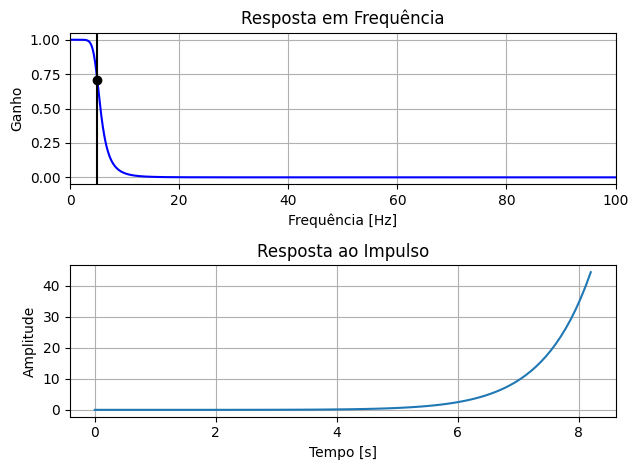

In [8]:
from scipy.signal import butter, freqz, impulse

order = 5
fs = 200.0      
cutoff = 5.0    

nyq = 0.5 * fs
normal_cutoff = cutoff / nyq

b, a = butter(order, normal_cutoff, btype='low', analog=False)

w, h = freqz(b, a, worN=8000)

plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Resposta em Frequência")
plt.xlabel('Frequência [Hz]')
plt.ylabel('Ganho')
plt.grid(True)

t, y = impulse((b, a))
plt.subplot(2, 1, 2)
plt.plot(t, y)
plt.title("Resposta ao Impulso")
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


## Questão 2b (1.0 ponto)

Escreva uma função para processar uma janela de $N$ amostras do sinal desejado. $N$ deve ser escolhido em torno de 1 segundo de sinal, aproximadamente. A filtragem deve ser feita no domínio da DFT (pode ser utilizada alguma função para cálculo da fft em Python, como a função fft da biblioteca numpy).

In [14]:
import numpy as np

def process_window(input_window, fs, cutoff):
    input_dft = np.fft.fft(input_window)
    frequencies = np.fft.fftfreq(len(input_window), d=1/fs)
    
    filter_transfer_function = np.zeros_like(input_window, dtype=float)
    filter_transfer_function[np.abs(frequencies) <= cutoff] = 1
    
    filtered_dft = input_dft * filter_transfer_function
    
    output_window = np.fft.ifft(filtered_dft)
    
    return output_window


## Questão 2c (1.0  ponto)

Escreva uma função para combinar a saída do processamento de cada janela na saída do sistema, utilizando **um** dos métodos vistos (*overlap and add* ou *overlap and save*). Indique claramente o método escolhido.


In [16]:
def overlap_and_add(windows, hop_size):
    output = np.zeros(((len(windows)-1)*hop_size + windows[0].size), dtype=complex)
    
    for i, window in enumerate(windows):
        output[i*hop_size : i*hop_size + window.size] += window

    return output


## Questão 2d (1.0  ponto)

Plote o sinal de entrada e saída do sistema dado tanto pelo processamento em janelas como pelo processamento do sinal completo. Pode ser utilizada alguma função da biblioteca do python para calcular a saída do sistema usando o sinal completo.

d:\Users\geral\Área de Trabalho\ssswsw\sstd\venv_projetos_sstd\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\Users\geral\Área de Trabalho\ssswsw\sstd\venv_projetos_sstd\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


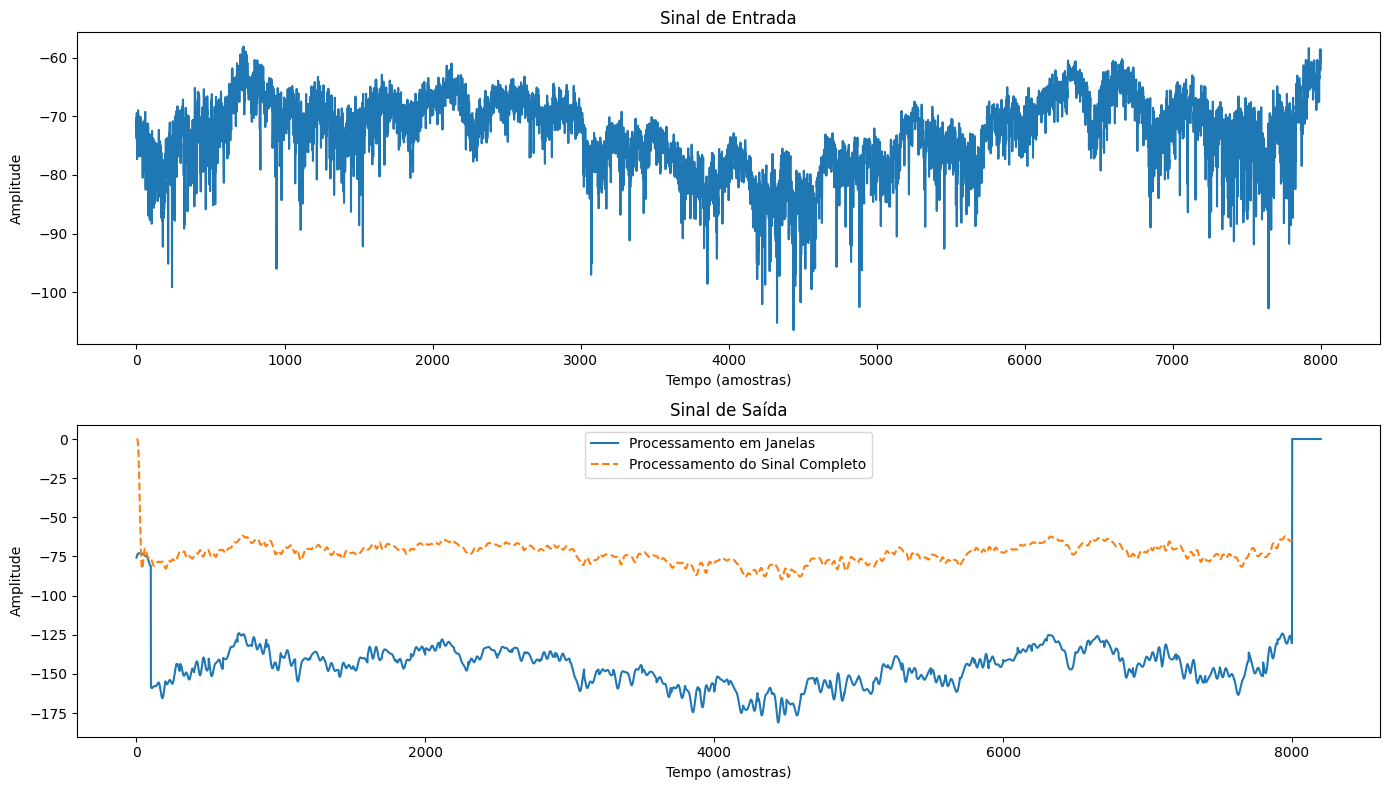

In [17]:
from scipy.signal import lfilter

fs = 200.0        
cutoff = 5.0      
window_size = 200 
hop_size = 100    

sinal = np.loadtxt('potencia.txt')

windows = [sinal[i : i + window_size] for i in range(0, len(sinal), hop_size)]

processed_windows = [process_window(window, fs, cutoff) for window in windows]

output_signal_windowed = overlap_and_add(processed_windows, hop_size)
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = butter(5, normal_cutoff, btype='low', analog=False)

output_signal_full = lfilter(b, a, sinal)
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.plot(sinal)
plt.title("Sinal de Entrada")
plt.xlabel('Tempo (amostras)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(output_signal_windowed, label='Processamento em Janelas')
plt.plot(output_signal_full, label='Processamento do Sinal Completo', linestyle='dashed')
plt.title("Sinal de Saída")
plt.xlabel('Tempo (amostras)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


# Questão 3

A equação diferença para um filtro FIR de tamanho $N$ pode ser escrita como:

$$
\begin{align}
	y\left[n\right] &= h_0 x\left[n\right] + h_1 x\left[n-1\right] + h_2 x\left[n-2\right] + h_3 \left[n-3\right] + \ldots + h_{N-1} x\left[n - \left(N- 1\right)\right] \\
	       &= \sum_{k=0}^{N-1} h_k x\left[n - k\right] 
\end{align}
$$

Os coeficientes do filtro, ou \textit{taps}, são expressados usando a variável $h_k$ para enfatizar que os próprios coeficientes representam a resposta ao impulso do filtro. A resposta em frequência do filtro é:

$$
\begin{align}
	H\left( \Omega \right) = \frac{Y\left( \Omega \right)}{X\left( \Omega \right)} = \sum_{k=0}^{N-1} h_k e^{-j \Omega k}
\end{align}
$$

Como $H\left( \Omega \right)$ é uma função com período $2 \pi$ da variável contínua $\Omega$, é suficiente especificar $H\left( \Omega \right)$ em apenas um período $0 \leq \Omega < 2 \pi$. 

Em muitas aplicações, a resposta em magnitude desejada do filtro $\left|H_d \left( \Omega \right)\right|$ é conhecida, mas não os coeficientes $h_k$ do filtro. A questão é, então, determinar os coeficientes do filtro a partir da resposta em magnitude desejada. Podemos fazer isso simplesmente amostrando a resposta em frequência desejada $\left|H_d \left( \Omega \right)\right|$ com $N$ amostras em um período, e então fazendo a DFT inversa dessas amostras (obtendo $h\left[n\right]$). Note que a definição dos coeficientes $h_k$ é suficiente para determinar o sistema do filtro FIR. Além disso, como $H \left( \Omega \right)$ foi obtido amostrando $\left|H_d \left( \Omega \right)\right|$ para algumas frequências, garantimos que a resposta em frequência do filtro projeto será igual a resposta em frequência desejada ao menos nos valores de amostragem. Finalmente, observe que, ao fazer a DFT inversa, alguns coeficientes $h_k$ podem ter uma pequena componente imaginária que deve ser descartada para o projeto de um filtro real. 



## Questão 3a (1.0  ponto)

Considere então um sinal de ECG amostrado a uma taxa de $500$ Hz. Projete um filtro digital FIR através da amostragem de frequência passa-baixas com frequência de corte igual a $50$ Hz. 

Plote a resposta ao impulso $h\left[n\right]$ e a resposta em frequência $H\left(\Omega\right)$ do filtro para $N = 21$, $N = 31$ e $N = 41$. Compare os filtros com a resposta em frequência desejada. 

In [9]:
#Resposta da questão 3a

## Questão 3b (1.0  ponto)

A resposta ao impulso do filtro do item anterior deveria ser uma função *sinc*, que é uma função com suporte infinito. Porém, a amostragem amostra apenas a parte para $n$ positivo, gerando uma descontinuidade e uma resposta em frequência mais pobre. Uma forma de melhorar essa amostragem é centralizar a função *sinc* - para isso, devemos multiplicar a resposta em frequência do filtro $H\left(\Omega\right)$ por $e^{-j \Omega \frac{\left(N - 1\right)}{2}}$. Utilize essa técnica para gerar novos filtros com $N = 21$, $N = 31$ e $N = 41$. Compare os filtros com os filtros do item anterior com o mesmo tamanho.

In [10]:
#Resposta da questão 3b

## Questão 3c (1.0  ponto)

Aplique o filtro com $N = 41$ no sinal do arquivo "noisy\_ecg\_data\_3.mat". Compare o sinal de entrada com o sinal de saída. O que acontece com os picos do ECG? 

In [11]:
#Resposta da questão 3c

sinal = sp.io.loadmat('noisy_ecg_data_3.mat')['noisy_ecg_3'].ravel()

## Questão 3d (1.0  ponto)

Utilize a técnica de *zero-phase filtering* com o filtro do item anterior. Compare a saída do sistema com e sem a aplicação da técnica.

In [12]:
#Resposta da questão 3d